In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

In [2]:
wine = pd.read_csv('wine_sample.csv')

In [3]:
X = wine[['sulphates', 'alcohol']]
y = wine[['type']]

# Create training/testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Define candidate models
knnModel = KNeighborsClassifier(n_neighbors=5)
logisticModel = LogisticRegression()

In [5]:
# Define a set of cross-validation folds
kf = KFold(n_splits=10, random_state=19, shuffle=True)

In [6]:
# Fit k-nearest neighbors with 10-fold cross-validation to the training data
knnResults = cross_validate(knnModel, X_train, np.ravel(y_train), cv=kf)

knnScores = knnResults['test_score']

# View accuracy for each fold
print('k-nearest neighbor scores:', knnScores.round(3))

# Calculate descriptive statistics
print('Mean:', knnScores.mean().round(3))
print('SD:', knnScores.std().round(3))

k-nearest neighbor scores: [0.667 0.667 0.889 0.5   0.722 0.833 0.667 0.611 0.833 0.5  ]
Mean: 0.689
SD: 0.127


In [7]:
# Logistic model performance on testing
knnModel.fit(X_train, np.ravel(y_train))
knnModel.score(X_test, np.ravel(y_test))

0.65

In [8]:
# Fit logistic regression with 10-fold cross-validation to the training data
logisticResults = cross_validate(logisticModel, X_train, np.ravel(y_train), cv=kf)

logisticScores = logisticResults['test_score']

# View accuracy for each fold
print('Logistic regression scores:', logisticScores.round(3))

# Calculate descriptive statistics
print('Mean:', logisticScores.mean().round(3))
print('SD:', logisticScores.std().round(3))

Logistic regression scores: [0.667 0.778 0.778 0.444 0.722 0.889 0.722 0.611 0.722 0.667]
Mean: 0.7
SD: 0.112


In [9]:
# Logistic model performance on testing
logisticModel.fit(X_train, np.ravel(y_train))
logisticModel.score(X_test, np.ravel(y_test))

0.8

In [10]:
# Combine scores from both models into a dataframe
df = pd.DataFrame({'knn': knnScores, 'logistic': logisticScores})

Text(0, 0.5, 'Cross-validation scores')

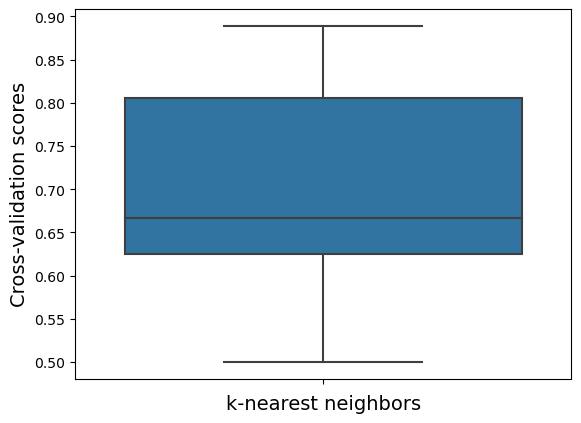

In [11]:
# Boxplot of errors for k-nearest neighbors
p = sns.boxplot(data=df, y='knn')
p.set_xlabel('k-nearest neighbors', fontsize=14)
p.set_ylabel('Cross-validation scores', fontsize=14)

Text(0, 0.5, 'Cross-validation scores')

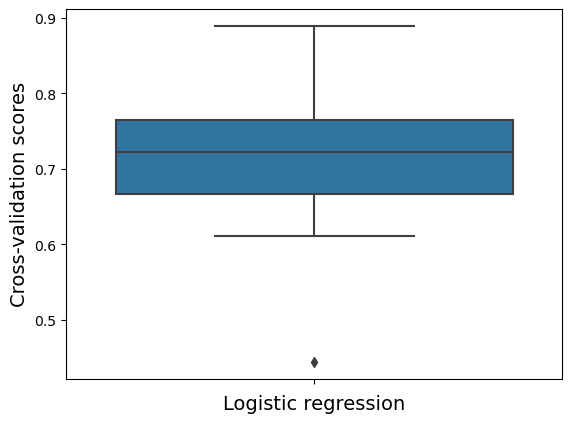

In [12]:
# Boxplot of errors for logistic regression
p = sns.boxplot(data=df, y='logistic')
p.set_xlabel('Logistic regression', fontsize=14)
p.set_ylabel('Cross-validation scores', fontsize=14)